# **Automated Web Scraper For Amazon.com**

<br>

**Automated Web Scraper** to extract data from **amazon.com** that we can use for any data analysis,data science or machine learning project.



# Installation

We will be using:
* **Selenium**
* **BeautifulSoup**
* **Webdrivers**

Uncomment the following cells to run the installation

In [ ]:
!pip install selenium
!pip install msedge-selenium-tools
!pip install bs4

     |████████████████████████████████| 911kB 5.3MB/s 


In [ ]:
!pip install chromedriver_binary==87.0.4280.88 #install the version that corresponds to the version of your browser

  Created wheel for chromedriver-binary: filename=chromedriver_binary-87.0.4280.88.0-cp36-none-any.whl size=6128118 sha256=d976b5ca7734c0b0f07fa23de42c496c2013ef2b3784350b0119d2df56ee94c2
  Stored in directory: /root/.cache/pip/wheels/39/82/ea/fca043277463ba07a0cf63255a2beeab24a2f3d56b0749c3cb
Successfully built chromedriver-binary


<br>

**Import the necessary libraries**

In [ ]:
from selenium import webdriver
import chromedriver_binary

#for moicrosoft edge
from msedge.selenium_tools import Edge, EdgeOptions
import csv

**Setup the web driver**

In [ ]:
#for chrome users
driver = webdriver.Chrome()

# driver = webdriver.Chrome(executable_path='/Macintosh HD/Users/mybeast/Dowmloads/chromedriver')

**For Firefox and microsoft edge run the following cell**

In [ ]:
## for Firefox

#driver = webdriver.Firefox()


##for microsoft edge

# options = EdgeOptions()
# options.use_chromium =True
# driver = Edge(options=options)

## reference:

## https://github.com/mozilla/geckodriver/releases/download/v0.28.0/geckodriver-v0.28.0-win64.zip
## https://sites.google.com/a/chromium.org/chromedriver/

## https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/


Let's now specify the URL we will like to get data from. In this case: https://www.amazon.com/

In [ ]:
url= 'https://www.amazon.com/'

In [ ]:
driver.get(url)

In [ ]:
driver.get(url)

<br>

If we type any keyword in the **Amazon.com** search bar, we realise that the search term is embedded in the search url.Using ths pattern, we can create a generic function that will build the required url for our driver to to actually retrieve.

<br>

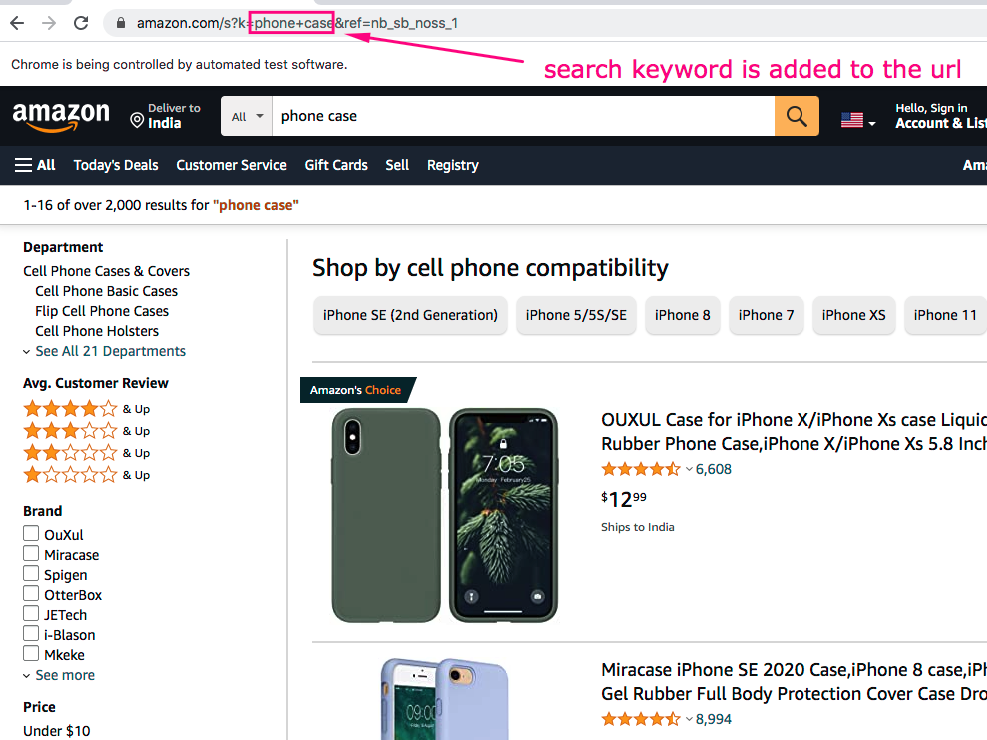

<br>

<br>

**We will define a function which we will later by just passing in our keyword to search on amazon.com as shown below**

In [ ]:
def my_url(keyword):
    
#     temp = 'https://www.amazon.com/s?k=phone+case&ref=nb_sb_noss_1' #let's get rid of the 'phone+case' and replace it with {} to make the url generic.
      temp = 'https://www.amazon.com/s?k={}&ref=nb_sb_noss_1' # a template url
      keyword = keyword.replace(' ', '+')
      return temp.format(keyword)

In [ ]:
#we can pass our keyword in the function to get the correct url of the keyword on amazon.com

url=my_url('laptop') 
url

'https://www.amazon.com/s?k=laptop&ref=nb_sb_noss_1'

In [ ]:
#we can even pass multiple keywords
url=my_url('laptop charger')
url

'https://www.amazon.com/s?k=laptop+charger&ref=nb_sb_noss_1'

In [ ]:
driver.get(url) #this will open in your browser and return the page for your keyword

Now let's study the **amazon.com** a little bit.

We can realise that the page is quite structured, although there are some few records that we need to deal with. What we want to do is to extract data from each record. There are also multiple pages (e.g 1-20 pages can be returned for a single keyword search). 

Just like we did earlier on, we need to access the html of the page in order to extract the required data. We will create a Beutiful Soup object for this.

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(driver.page_source,'html.parser')

Just like we did earlier on, we can find a tag  that contains the data we want. 
We can right-click on say a title on the search results page to inspect. We found that the **div tag**  with the **data-component-type=s-search-results** contains the data we need.

Something like what you can see below:

<br>

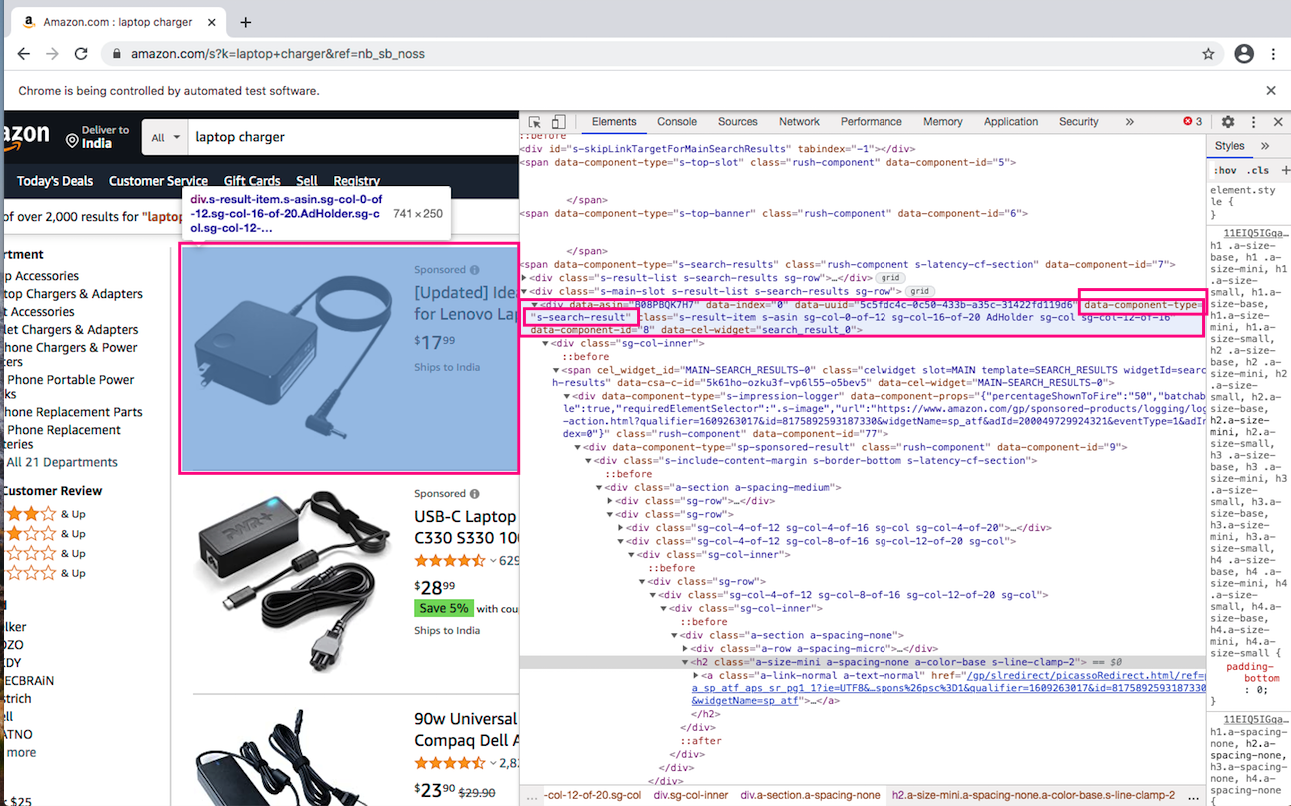

<br>

In [ ]:
soup_results=soup.find_all('div',{'data-component-type':'s-search-result'})

In [ ]:
len(soup_results)

60

We will now create a template which we can based on to make a generic request to extract the data that we need. 

In [ ]:
# we will assign our first result to an obj

obj=soup_results[0]

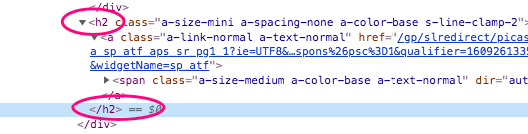

In [ ]:
atag = obj.h2.a #create the h2 tag variable

In [ ]:
des = atag.text.strip()

In [ ]:
des #we can see below that we have the title correctly scraped

'Replacement 61W Mac Book Pro 13 Inch Laptop Charger USB C Power Adapter Universal Type C PD for New MacBook Air 13/12 inch 2020, 2019, 2018, iPad Pro 12.9 11'

In [ ]:
#let's now create a generic url

url='https://www.amazon.com/'+atag.get('href')

##Get the Price

**Example**

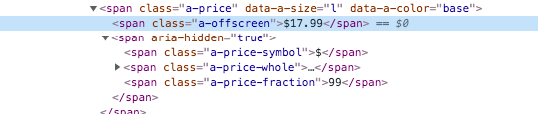

In [ ]:
#let's get the price same way we searched for the title by looking for the div tag, in this case, we will look for the tag that contains the price of the item.

#we will get this from the 'span' which contains the a-price and then use the 'span' which contains 'a-offscreen' to obtain the actual price.

parent=obj.find('span','a-price')

price=parent.find('span','a-offscreen').text

price

'$35.99'

##Get the Reviews

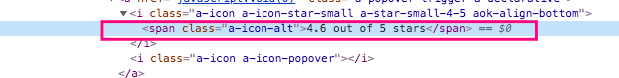

In [ ]:
#We will do the same thing for the Reviews


rate=obj.find('span','a-icon-alt').text
rate

'3.5 out of 5 stars'

In [ ]:
# alternatively
obj.i.text

'3.5 out of 5 stars'

<br>

<br>

##Get the review Counts

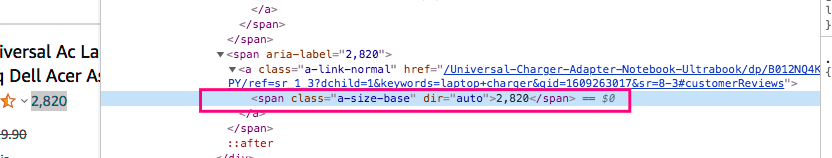

<br>

<br>

In [ ]:
#we can get the number of customers who have reviewed the item as well

counts_review=obj.find('span',{'class':'a-size-base','dir':'auto'}).text
counts_review

'14'

In [ ]:
# obj.img

# **Generic Fuction**

We will now create a generic fuction for the sub codes to extract all the data at once.

In [ ]:
from selenium import webdriver
import chromedriver_binary
from bs4 import BeautifulSoup
#for moicrosoft edge
from msedge.selenium_tools import Edge, EdgeOptions
import csv

#We will be using functions to achieve this

def my_url(keyword):
    temp = 'https://www.amazon.com/s?k={}&ref=nb_sb_noss_1'
    keyword = keyword.replace(' ', '+')
    
    # Add Term Query To URL
    url = temp.format(keyword)
    
    # Add Page Query Placeholder
    url += '&page{}'
    
    return url

def extract_record(obj):
    atag = obj.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.com' + atag.get('href')
    
    #it is possible that some items on amazom.com might not be having one of the items we are looking for(e.g. some items might not be having ratings or price), we will be getting error if we dont take care of that. We will therefore add some error handlers
    #if there are no price,probably the item is out of stock or not available, then we will ignore the item, but if there are no reviews yet, it's fine, we will still want to extract the item.
    try:
        parent=obj.find('span','a-price')
        price=parent.find('span','a-offscreen').text
    except AttributeError: #we are excepting the error if it occurs so that we can move to extract the next item, else the program will stop running and gives error
        return
    
    try:
        rate=obj.i.text
        counts_review = obj.find('span', {'class': 'a-size-base', 'dir': 'auto'}).text
    except AttributeError:
        #assigning empty string to ratings and 
        rate = ''
        counts_review = ''
    
    image = obj.find('img', {'class': 's-image'}).get('src') 
    
    #let's create a tuple that will contain all these items and assign it to a result variable
    result = (description, price, rate, counts_review, url,image)
    return result

'''Run Main Program Routine'''
def main(keyword):
    # Startup The Webdriver
    driver = webdriver.Chrome()
#     options = EdgeOptions()
#     options.use_chromium =True
#     driver = Edge(options=options)
    
    records = []  #an empty records list to contain all of our extracted records
    url =my_url(keyword)
    
    for page in range(1, 50):
        driver.get(url.format(page))
        soup =BeautifulSoup(driver.page_source, 'html.parser')
        results=soup.find_all('div',{'data-component-type':'s-search-result'})
#         results=soup.find_all('div',{'data-component-type': 's-search-result'}) #same as we did above

        
#we will like to check if what we have return from the extract_record function is empty or not
        for item in results:
            record = extract_record(item) 
            if record: #if the record has something in it append to records list
                records.append(record) 
                
#         driver.quit()
    
#     # Save Results To CSV File
        with open('Results.csv', 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['Description', 'Price', 'Rating', 'Reviews Count', 'URL','Image link'])
            writer.writerows(records)

In [ ]:
main('school bag') #we can search for any item to extract data

<br>

**You can scrape as many data points as possible with any keyword, oh yes !!**


You can load the dataset you have scraped and perform and use it for your project

In [ ]:
df=pd.read_csv('Documents/Results.csv')
df

<IPython.core.display.Javascript object>

,Description,Price,Rating,Reviews Count,URL,Image link
0,"Mancro Laptop Backpack, Business Water Resista...",$21.99,4.7 out of 5 stars,"15,671",https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/81I7kfacG6...
1,SHRRADOO Durable Waterproof Anti Theft Laptop ...,$23.99,4.7 out of 5 stars,"9,166",https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/81yBu9k41y...
2,"Nickelodeon Paw Patrol 15"" School Bag Backpack...",$13.99,4.4 out of 5 stars,30,https://www.amazon.com/Nickelodeon-Patrol-Scho...,https://m.media-amazon.com/images/I/61sujnuegg...
3,SHRRADOO Durable Waterproof Anti Theft Laptop ...,$23.99,4.7 out of 5 stars,"9,166",https://www.amazon.com/SOLDIERKNIFE-Waterproof...,https://m.media-amazon.com/images/I/81yBu9k41y...
4,mommore Clear Backpack Durable Clear Bookbags ...,$28.99,4.6 out of 5 stars,208,https://www.amazon.com/mommore-Backpack-Transp...,https://m.media-amazon.com/images/I/61ZEVrvoEv...
...,...,...,...,...,...,...
1061,Monsdle Travel Laptop Backpack Anti Theft Wate...,$23.99,4.7 out of 5 stars,413,https://www.amazon.com/Monsdle-Backpack-Resist...,https://m.media-amazon.com/images/I/71o4LwvQK3...
1062,VIDOSCLA Teens Elementary School Bag Casual Da...,$18.99,4.4 out of 5 stars,394,https://www.amazon.com/VIDOSCLA-Elementary-Day...,https://m.media-amazon.com/images/I/61hiiNGxv9...
1063,School Backpack School Bag Bookbag Cartoon Ani...,$26.97,4.6 out of 5 stars,269,https://www.amazon.com/School-Backpack-Bookbag...,https://m.media-amazon.com/images/I/71gwDLTbII...
1064,Leaper School Backpack for Kids Daypack Travel...,$16.99,4.6 out of 5 stars,"1,113",https://www.amazon.com/Leaper-Thickened-Backpa...,https://m.media-amazon.com/images/I/81tjRiFSW-...
